<a href="https://colab.research.google.com/github/hshuai97/Colab20210803/blob/main/LR_SVM_ANN_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) 逻辑回归（Logistic Regression）和支持向量机（Support Vector Machine）实验

2) 人工神经网络（Artificial Neural Network）

#  1 逻辑回归

## 1.1 回归与分类的区别

根据处理的问题来看，回归是对连续型变量进行建模和预测，预测值连续，而分类是对离散型变量建模和预测，预测值为离散的类别；

典型的回归问题：房价预测，股票价格走势预测，商品销售量预测；典型的分类问题：垃圾邮件分类，评价的正负面分类；

## 1.2 逻辑回归是分类

逻辑回归使用sigmoid(x)函数将输入的变量进行二分类;

\begin{equation}
  f(x) = \frac{1}{1+e^{-x}}
\end{equation}

函数图像如下：

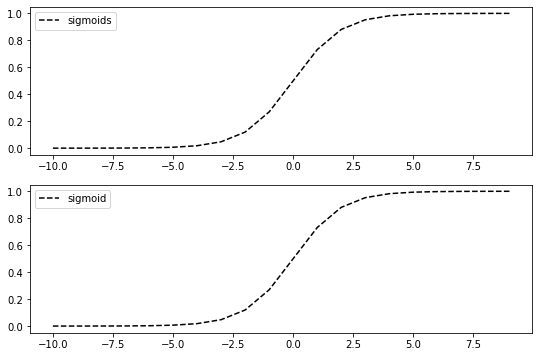

In [2]:
import matplotlib.pyplot as plt
import math

x = [i for i in range(-10,10,1)]  # 生成-10到10之间的以1递增的数

func=lambda j : 1 / (1 + math.pow(math.e, -j))  # 编写一个sigmoid函数

y = [func(j) for j in x]  # 依次传入每个x, 得到对应的f(x)

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(2,1,1)  # 添加一个1*1的图，对第一个图进行绘制
ax1 = fig.add_subplot(2,1,2) 

ax.plot(x, y, "k--", label="sigmoids")  # 画图
ax1.plot(x, y, "k--", label="sigmoid")  # 画图

ax.legend()  # 显示线条的名称
ax1.legend() 

plt.show()

逻辑回归模型的一般形式：

\begin{equation}
  f_\theta(x) = \frac{1}{1+ e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 +\cdots +\theta_nx_n)}}
\end{equation}

数据集介绍：400个学生的学习总分数和绩点信息，申请学校，预测学生是否被录取

In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/comp/data-LR-SVM/5_logisitic_admit.csv")  # 读csv数据，见群文件
df.insert(1, "ones", 0)  # 插入1列作为截距\theta_0
df.tail(10)  # 查看表尾的10行数据

#"D:\SoftPackage\MicrosoftVisualStudio\Workspace\Test\test.cpp"

,admit,ones,gre,gpa
390,1,0,800,3.05
391,1,0,660,3.88
392,1,0,600,3.38
393,1,0,620,3.75
394,1,0,460,3.99
395,0,0,620,4.00
396,0,0,560,3.04
397,0,0,460,2.63
398,1,0,700,3.65
399,0,0,600,3.89


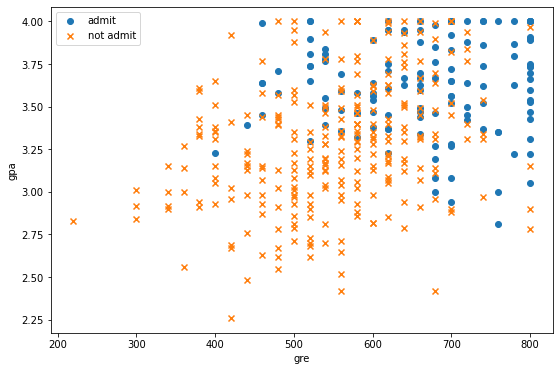

In [5]:
adm = df[df["admit"]==1]   # 把2类数据分开画图查看
no_adm = df[df["admit"]==0]

fig = plt.figure(figsize=(9, 6))  # 画图步骤同上
ax = fig.add_subplot(1,1,1)

ax.scatter(adm["gre"], adm["gpa"], marker='o', label = "admit")  # 画散点图用scatter
ax.scatter(no_adm["gre"], no_adm["gpa"], marker="x", label="not admit")

ax.legend()
ax.set_xlabel("gre")  # 为x轴设置名称
ax.set_ylabel("gpa")

plt.show()

In [6]:
import numpy as np

# 提取样本的X和y
X = df.iloc[:, 1:4]  # 取1-3列的数据为X
y = df.iloc[:, 0]

# 将X, y转成数组
X = np.array(X)
y = np.array(y)

m, n = np.shape(X)  # 查看数组的维度（形状）
m,n

(400, 3)

用sklearn库下的LogisticRegression模块进行分类：

In [7]:
from sklearn.linear_model import LogisticRegression  # 导入逻辑回归包

classifier = LogisticRegression(C=1.3)  # 实例化一个逻辑回归的分类器对象
classifier.fit(X, y)  # 训练数据

classifier.coef_  # 打印损失误差最小的时候\theta_0, \theta_1, \theta_2的值

array([[0.        , 0.00944915, 2.18284071]])

训练集的分类准确率：

In [8]:
pred = classifier.predict(X)   # 预测数据

correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a, b) in zip(pred, y)]  # 删选出分类正确的样本个数

acc = sum(map(int, correct)) / len(correct)  # 相当于训练集上的准确率

acc

0.76

In [9]:
# classifier.score(X, y)  # 上面一段函数功能等于这个内置的函数

# 2 支持向量机

svm工具包：https://www.csie.ntu.edu.tw/~cjlin/libsvm/index.html

##  2.1 超平面与间隔最大化

1）超平面，从二维到n维：

\begin{equation}
  \omega_1x_1 + \omega_2x_2 + \cdots +  \omega_nx_n=0, ( \omega_1, \omega_2, \cdots,  \omega_n不同时为0)
\end{equation}

2) 几何间隔定义：所有样本点到超平面的几何间隔的最小值作为几何间隔：
\begin{equation}
  \hat{\gamma}_i = y_i(\frac{\omega}{||\omega||}x_i + \frac{b}{||\omega||}),  ||\omega||=\sqrt{\omega_1^2+\omega_2^2+\cdots +\omega_n^2}
\end{equation}

\begin{equation}
  \hat{\gamma} = \min_\limits{i=1, \cdots, N} \hat{\gamma}_i
\end{equation}

3）间隔最大化：找到“最合适”的超平面使得间隔最大：
\begin{equation}
  \max_\limits{w, b} \frac{\hat{\gamma}}{||\omega||}\\
  s.t. y_i(w\cdot x_i + b) \geq \hat{\gamma}
\end{equation}



其中，$(x_i, y_i)$是样本点，$x_i$为第$i$个样本，$y_i$是标签;


4）支持向量：数据点处在最优平面的上下界上的点都是支持向量

##   2.2 线性不可分支持向量机

1）线性可分支持向量机：用一个超平面可以划分开

2）线性不可分支持向量机：存在交叉的点，超平面分不开；

3）非线性可分支持向量机；

3）多类分类支持向量机；

线性不可分：

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  # 支持向量机函数库

cls = SVC(kernel="linear", C=0.01)
cls.fit(X, y)  # 训练数据

cls.score(X, y)  # 训练集上的分类精度

0.77

In [11]:
cls = SVC(kernel="poly", degree=2)  # 核函数为多项式的SVM
cls.fit(X, y)  # 训练数据

cls.score(X, y)  # 训练集上的分类精度

0.77

In [12]:
cls = SVC(kernel="rbf", gamma=1.5)  # 核函数为径向基的SVM
cls.fit(X, y)  # 训练数据

cls.score(X, y)  # 训练集上的分类精度

0.8075

In [13]:
cls = SVC(kernel="sigmoid", gamma=1)  # 核函数为sigmoid的SVM
cls.fit(X, y)  # 训练数据

cls.score(X, y)  # 训练集上的分类精度

0.6725

可以调的参数：

SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, 
shrinking=True, probability=False, tol=0.001, cache_size=200,
 class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)

# 3 人工神经网络

## 3.1反向传播BP神经网络

In [105]:
# 导入包
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler  # 对数据进行标准化操作

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)   # 执行了z = (x - u) / s，u是特征的均值，s是特征的标准方差
X

array([[ 0.        , -1.80026271,  0.57907221],
       [ 0.        ,  0.62666824,  0.73692924],
       [ 0.        ,  1.84013372,  1.60514292],
       ...,
       [ 0.        , -1.10685387, -1.99925931],
       [ 0.        ,  0.97337266,  0.68431023],
       [ 0.        ,  0.10661161,  1.31573836]])

In [106]:
from sklearn.model_selection import train_test_split  # 划分训练集、测试集

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)  #划分训练集和测试集，测试集大小为25%的样本

X_train.shape  # 查看训练集的X的形状

(300, 3)

In [107]:
from sklearn.neural_network import MLPClassifier  # 多层感知器，典型的一个BP神经网络

mlp = MLPClassifier(solver="adam", activation="tanh", alpha=1e-4, hidden_layer_sizes=(50,),
                    learning_rate_init=0.001, max_iter=2000)  # 实例化一个MLP分类器

mlp.fit(X_train, y_train)  # 用训练集训练模型的参数

MLPClassifier(activation='tanh', hidden_layer_sizes=(50,), max_iter=2000)

In [108]:
y_pred = mlp.predict(X_test)  # 测试集上的预测结果
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

准确率：
\begin{equation}
  acc = \frac{correct}{total}
\end{equation}

In [109]:
from sklearn.metrics import accuracy_score
# 计算accuracy
acc = accuracy_score(y_test, y_pred)
acc

0.74

In [110]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[52,  9],
       [17, 22]])

# 总结

额外实验：将上面三个分类实验整合

In [2]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler  # 对数据进行标准化操作
from sklearn.model_selection import train_test_split  # 划分训练集、测试集

from sklearn.metrics import confusion_matrix



df = pd.read_csv("/content/drive/MyDrive/comp/data-LR-SVM/5_logisitic_admit.csv")  # 读csv数据，见群文件
df.insert(1, "ones", 0)  # 插入1列作为截距\theta_0

# 提取样本的X和y
X = df.iloc[:, 1:4]  # 取1-3列的数据为X
y = df.iloc[:, 0]

# 将X, y转成数组
X = np.array(X)
y = np.array(y)

m, n = np.shape(X)  # 查看数组的维度:（400， 3）
#print(m,n)


# 数据标准化
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)   # 执行了z = (x - u) / s，u是特征的均值，s是特征的标准方差
#print(X)

# 划分训练集、测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)  #划分训练集和测试集，测试集大小为25%的样本

数据准备完毕，使用分类器分类：LR, SVM, ANN

In [8]:
# 用逻辑回归分类
from sklearn.linear_model import LogisticRegression  # 导入逻辑回归包

classifier = LogisticRegression(C=1.3)  # 实例化一个逻辑回归的分类器对象
classifier.fit(X_train, y_train)  # 训练数据

acc1 = classifier.score(X_test, y_test) 
print(acc1)


pred1 = classifier.predict(X_test)   # 预测数据
confusion_matrix(y_true=y_test, y_pred=pred1)

0.73


array([[52,  9],
       [18, 21]])

In [11]:
# 使用支持向量机分类
from sklearn.svm import SVC  # 支持向量机函数库

cls = SVC(kernel="rbf", gamma=1.5)  # 核函数为径向基的SVM
cls.fit(X_train, y_train)  # 训练集上训练数据

acc2 = cls.score(X_test, y_test)  # 测试集上的分类准确率

print(acc2)

pred2 = cls.predict(X_test)   # 预测数据
confusion_matrix(y_true=y_test, y_pred=pred2)

0.69


array([[55,  6],
       [25, 14]])

In [14]:
# 使用神经网络分类
from sklearn.neural_network import MLPClassifier  # 多层感知器，典型的一个BP神经网络

mlp = MLPClassifier(solver="adam", activation="tanh", alpha=1e-4, hidden_layer_sizes=(50,),
                    learning_rate_init=0.001, max_iter=2000)  # 实例化一个MLP分类器

mlp.fit(X_train, y_train)  # 用训练集训练模型的参数

acc3 = mlp.score(X_test, y_test)
print(acc3)

pred3 = mlp.predict(X_test)   # 预测数据
confusion_matrix(y_true=y_test, y_pred=pred3)

0.74


array([[51, 10],
       [16, 23]])